# Imports

In [ ]:
! pip install swifter &> /dev/null
! pip install spacy &> /dev/null
! pip install textacy &> /dev/null

In [ ]:
import spacy
import pandas as pd
from tqdm.auto import tqdm 
import swifter
import numpy as np
import plotly.express as px
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import os
import re
import gensim
import string
import textacy
from collections import Counter
from nltk.util import ngrams
from matplotlib import pyplot
import seaborn as sns
pd.options.plotting.backend = "plotly"

In [ ]:
! python -m spacy download en_core_web_md &> /dev/null
! pip install spacytextblob &> /dev/null

In [ ]:
from spacytextblob.spacytextblob import SpacyTextBlob
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Data import

In [ ]:
docs2 = []
names = []

for i in range(1,22):
  path = "drive/MyDrive/MAIR_PC/Batch" + str(i) + "txt"
  os.chdir(path)
  #print(os.getcwd()) 
      
  # iterate through all file
  for file in os.listdir():
      # Check whether file is in text format or not
      if file.endswith(".txt"):
          file_path = f"{path}/{file}"
          names.append(file)
          #print(file_path)
          # call read text file function
          os.chdir("/content")
          text_file = open(file_path, "r")
          #print(text_file)
          data = text_file.read()
          docs2.append(data)
os.chdir("/content")

In [ ]:
docs3 = []
for x in docs2:
    docs3.append(x.replace("\n" or "\u200b", " "))

d = {"Name": names, "Text": docs3}
df = pd.DataFrame(d)
df['word_count'] = df["Text"].apply(lambda x : len(x.split()))
df['char_count'] = df['Text'].apply(lambda x : len(x.replace(" ","")))
df['word_density'] = df['word_count'] / (df['char_count'] + 1)

df.head(5)

,Name,Text,word_count,char_count,word_density
0,F514570-Comment_Guild_Kuskonmaz_Moffatt_Bigo_M...,Ref. Ares(2020)2315199 - 30/04/2020 Queen Mar...,5591,29559,0.189141
1,F514589-Recommendations_on_the_Whitepaper_on_A...,Ref. Ares(2020)2315327 - 30/04/2020 Recommend...,7168,39826,0.179978
2,F514594-Repository_of_A-Robotics_Initiatives.txt,Ref. Ares(2020)2315332 - 30/04/2020 Thank you...,50,266,0.187266
3,F514603-2020_03_17_Eurosmart_positionpaper_AI.txt,Ref. Ares(2020)2315393 - 30/04/2020 THE EP IN...,1594,9253,0.172250
4,F514698-towards_a_european_ai_society_ecosyste...,"Leonie Beining, Peter Bihr, Stefan Heumann Feb...",4786,27268,0.175511


In [ ]:
df.sort_values(by=['word_count'],ascending=False)[:5]

,Name,Text,word_count,char_count,word_density
331,F530487-Wachter_et_al_A_Right_to_Reasonable_In...,Columbia Business Law Review – Vol. 2019 – Iss...,44641,253138,0.176350
67,F529842-200217_AI_Liability_and_PLD_Reform_-_L...,Ref. Ares(2020)3356811 - 26/06/2020 F.I.C.M. ...,42282,232726,0.181681
15,F514771-document.txt,CONSTITUTION OF MALTA Ref. Ares(2020)2316087 ...,37356,180475,0.206986
333,F530487-Wachter_et_al_Why_Fairness_Cannot_Be_A...,"Ref. Ares(2020)3357466 - 26/06/2020 WACHTER, ...",29793,176059,0.169221
11,F514564-Hacker_2020_on_AI_regulation_in_EU_and...,Ref. Ares(2020)2315204 - 30/04/2020 AI Regula...,28934,166562,0.173712


### Long texts
11 - 51 pages long text with good infratruture (Tables of Content) with on the first sight, quality content, describing more matters than described in the questionairee

15 - constitution of malta ?!?!

67 - less important thing in french and some other language, random structure, patchwork of things that are not connected to themselves.

331 & 333 Sandra Wachter and the others posted 6 different pdfs which are talking about specific problems like (not) automating of fairness (333). These documents cover lots of inormation, regulations and so on

In [ ]:
df.sort_values(by=['word_count'],ascending=True)[:20]

,Name,Text,word_count,char_count,word_density
2,F514594-Repository_of_A-Robotics_Initiatives.txt,Ref. Ares(2020)2315332 - 30/04/2020 Thank you...,50,266,0.187266
232,F530249-AI_letter.txt,Ref. Ares(2020)3359988 - 26/06/2020 Dear Mada...,61,466,0.130621
323,F530396-Addendum_for_EC_Consultation_Response.txt,Ref. Ares(2020)3359939 - 26/06/2020 Addendum ...,167,1659,0.100602
328,F530483-Contribution-Consultation-AI-CNUE-Acco...,Ref. Ares(2020)3357459 - 26/06/2020 In the co...,191,1065,0.179174
14,F514772-Consultation_Response_AI.txt,Ref. Ares(2020)2316090 - 30/04/2020 European ...,196,1109,0.176577
187,F530124-Accompanying_document_AI_White_Paper_c...,Ref. Ares(2020)3432082 - 30/06/2020 Philips w...,197,1105,0.178119
72,F529039-white_paper.txt,Ref. Ares(2020)3355121 - 26/06/2020 Concernin...,199,1066,0.186504
339,F530473-comments-about-White-Paper-AI-Europe.txt,Francisco Javier Díez Ref. Ares(2020)3359094 ...,232,1318,0.175891
326,F530402-ideasonai_moritzschleicher.txt,Ref. Ares(2020)3359888 - 26/06/2020 Further s...,242,1301,0.185868
69,F529844-White_paper_on_Artificial_Intelligence...,Ref. Ares(2020)3356777 - 26/06/2020 WHITE PAP...,267,1511,0.176587


### Short Texts
2 - Thanks for interes

14 - info about what danish government is doing

232 - links to the documents (huge, because they couldn't fit it in the given size)

323 - just links to some reports in the matter

328 - 4 point given in two languages that should be concerned (no description, just a single sentence for the point)

Maybe lets consider texts above 250 words, because shorter ones 

In [ ]:
df = df[df["word_count"]>250]

In [ ]:
en = spacy.load("en_core_web_md")
en.add_pipe('spacytextblob')

# Data Cleaning

do wyrzucenia:
ref.
ares(2020)
ares
com(2020), com, com(2019)
długie liczby, np (2020) 3355667, >2023 wyrzucanie
26/06/2020 or 2005/29/EC or 2005/29 EC - daty generalnie

In [ ]:
def my_lower(text):
    return text.lower()
df["Text"]=df["Text"].apply(lambda x : my_lower(x))

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)
df['Text']=df['Text'].apply(lambda x : remove_URL(x))

def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)
df['Text']=df['Text'].apply(lambda x : remove_html(x))

def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)
df['Text']=df['Text'].apply(lambda x : remove_punct(x))

def custom_regex(text):
    ref=re.compile(r'ref|\.')
    ares=re.compile(r'ares|\(20(?:00|1[09]|2[01])\)')
    com=re.compile(r'com\([0-9]{1,4}\)')
    bignum = re.compile(r'[0-9]{5,30}')
    parenth = re.compile(r'\([0-9]{1,4}\)')
    email = re.compile(r'(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)')
    listing = re.compile(r'\([1-3]\)|\[[1-3]\]|[1-3]\.')
    page1 = re.compile(r'Page [0-9]{1,2}(?: \/ |\/)[0-9]{1,2}}')
    page2 = re.compile(r'Page [0-9]{1,2} of [0-9]{1,2}')
    page3 = re.compile(r'[0-9]{1,2} of [0-9]{1,2}')
    marks = re.compile(r'[\u2612\uF0B7\\x2D\u2022\u2713]')
    roman = re.compile(r'x(?:v?iii|i[vx]|x)|x(?:v?ii|vi?|i)?|v(?:i(?:ii|\.)|\.)|i(?:ii?\.|v\.|[\.x])|vii')
    questionaire = re.compile(r'1\-Not important at all|5\- Very important|2\- Not important|No opinion|4Important|3Neutral')
    text = ref.sub(r'',text)
    text = ares.sub(r'',text)
    text = com.sub(r'',text)
    text = bignum.sub(r'',text)
    text = parenth.sub(r'',text)
    text = email.sub(r'',text)
    text = listing.sub(r'',text)
    text = page1.sub(r'',text)
    text = page2.sub(r'',text)
    text = page3.sub(r'',text)
    text = marks.sub(r'',text)
    text = roman.sub(r'',text)
    text = questionaire.sub(r'',text)
    return text
df['Text']=df['Text'].apply(lambda x : custom_regex(x))

In [ ]:
df['Text'][1]

'     recommendations on the european commission’s white paper on artificial intelligence  a european approach to ecellence and trust com00 65 final the “ai white paper” by vasile țiple  recommendation 1 – establishing the principles of ai regulatory framework the eu artificial intelligence principles the current definitions given by the commission and the highlevel epert group do not differentiate between the different types of ai making such a distinction is important as different types of ai may require different approaches in terms of preparation for their implementation and safeguards which need to be put in place the development of a legal and technical regulatory framework for ai in the eu should focus on three principles the “ai principles” 1 understanding the potential of ai at this moment we can distinguish three types of ai basic ai which are capable of autonomous data gathering and analysis task and process automation document understanding machine learning etc autonomous a

# Tokenization

To poniżej trwa stasznie długo

In [ ]:
tqdm.pandas()
docs = df['Text'].swifter.apply(en)

Pandas Apply:   0%|          | 0/343 [00:00<?, ?it/s]

# Text lengths Distribution

In [ ]:
doc_lens = docs.str.len()
doc_lens.hist(log_y=True)

# POS - Parts of Speach analysis - nouns

In [ ]:
def get_nouns(docs):
  nouns = [token.text
         for doc in docs
         for token in doc
         if (not token.is_stop and
             not token.is_punct and
             token.pos_ == "NOUN")]
  return nouns

In [ ]:
nouns = get_nouns(docs)
noun_freq = Counter(nouns)
common_nouns = noun_freq.most_common(30)

In [ ]:
def plot_counts(count_obj, names):
  fig = px.bar(count_obj,orientation='h', y=names[0], x=names[1])
  fig['layout']['yaxis']['autorange'] = "reversed"
  fig.update_layout(bargap=0.30, font={'size':10})
  return fig

In [ ]:
common_nouns

[('data', 10024),
 ('ai', 5127),
 ('systems', 4090),
 ('risk', 3193),
 ('use', 2886),
 ('rights', 2743),
 ('applications', 2616),
 ('system', 2594),
 ('approach', 2484),
 ('framework', 2435),
 ('paper', 2265),
 ('research', 2143),
 ('development', 2136),
 ('risks', 2126),
 ('intelligence', 2105),
 ('requirements', 2079),
 ('protection', 2049),
 ('technology', 2046),
 ('commission', 1988),
 ('technologies', 1964),
 ('law', 1895),
 ('regulation', 1878),
 ('liability', 1851),
 ('information', 1703),
 ('innovation', 1600),
 ('sector', 1579),
 ('assessment', 1544),
 ('safety', 1448),
 ('highrisk', 1440),
 ('application', 1423)]

In [ ]:
count_nouns = pd.DataFrame(common_nouns, columns=['noun', 'count'])
plot_counts(count_nouns, ['noun', 'count'])

In [ ]:
def count_texts(texts,colnames=['obj', 'count'],n_obs=30):
  obj_freq = Counter(texts)
  common_obj = obj_freq.most_common(n_obs)
  count_obj = pd.DataFrame(common_obj, columns=colnames)
  return count_obj

# Word Cloud

In [ ]:
lemmas = docs.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct if token.is_alpha])
word_counts = Counter(lemmas.sum())

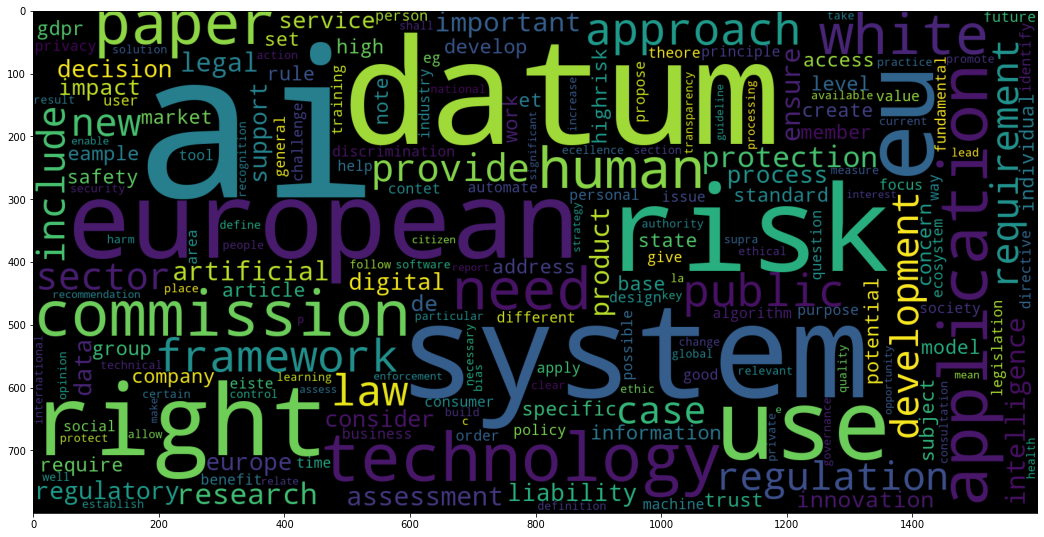

In [ ]:
wc = WordCloud(width=1600, height=800)
wc.generate_from_frequencies(frequencies=word_counts)
plt.figure(figsize=(18,14))
plt.imshow(wc)

In [ ]:
def lemmatized_word_cloud(docs):
  lemmas = docs.apply(lambda doc: [token.lemma_ for token in doc if not token.is_stop if not token.is_punct if token.is_alpha])
  word_counts = Counter(lemmas.sum())
  wc = WordCloud(width=1600, height=800)
  wc.generate_from_frequencies(frequencies=word_counts)
  plt.figure(figsize=(18,14))
  plt.imshow(wc)
  return word_counts

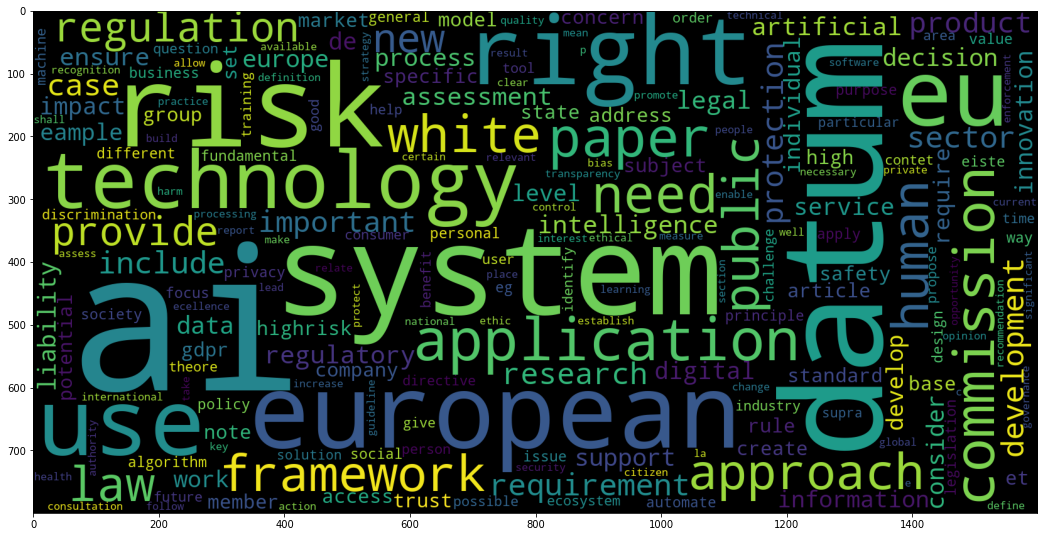

In [ ]:
word_counts = lemmatized_word_cloud(docs)

In [ ]:
counts = pd.DataFrame(word_counts.most_common(30), columns=['word', 'count'])
counts[:3]

,word,count
0,ai,20266
1,datum,8588
2,system,6722


In [ ]:
plot_counts(counts, ['word', 'count'])

# Typos
Couldn't find typo in lemmas

In [ ]:
type(en('systems'))

spacy.tokens.doc.Doc

In [ ]:
type(en('systems')[0])

spacy.tokens.token.Token

In [ ]:
en('typo')[0].lemma_

'typo'

In [ ]:
def amount_of_lemma(lemma, lemmas):
  typos = []
  for l in lemmas:
    is_typo = (lemma in l)
    typos.append(is_typo)
    
  int_t = []
  for t in typos:
    int_t.append(int(t))
  return sum(int_t)

In [ ]:
amount_of_lemma('typo',lemmas)

0

# Named Entities

In [ ]:
def get_entities(docs):
  entities = [(ent.text, ent.label_)
         for doc in docs
          for ent in doc.ents]
  return entities

In [ ]:
def unique(list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [ ]:
def organisation_like_entitites(docs, uniq=False):
  entities = get_entities(docs)
  if uniq:
    entities = unique(entities)
  entities_df = pd.DataFrame(entities, columns =['entity','type'])
  ls = ["EVENT","GPE","LAW","NORP","PERSON","ORG"]
  proper_ets = entities_df[entities_df['type'].isin(ls)]
  return proper_ets

In [ ]:
proper_ets = organisation_like_entitites(docs)
proper_ets

,entity,type
0,london,GPE
1,e1 4ns department of law tel,ORG
4,university of portsmouth portland street ports...,ORG
8,london,GPE
11,7404,ORG
...,...,...
46751,european,NORP
46760,eu,GPE
46763,eu,GPE
46765,european ai rd,ORG


In [ ]:
count_ent = proper_ets.value_counts()
#count_ent = pd.DataFrame(count_ent[:40])
#count_ent.columns =["entity","type","count"]
count_ent = count_ent.reset_index()
count_ent.columns =["entity","type","count"]

In [ ]:
plot_counts(count_ent[:20],["entity","count"])

# TF-IDF

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [ ]:
def dummy_fun(doc):
    return doc

In [ ]:
stopwords = en.Defaults.stop_words
vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True, norm=None)
#vectorizer = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,token_pattern=None) 
transformed_documents = vectorizer.fit_transform(df['Text'])
#transformed_documents = vectorizer.fit_transform(docs)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



In [ ]:
transformed_documents_as_array = transformed_documents.toarray()

In [ ]:
output_filenames = [range(len(transformed_documents_as_array))]
docs_as_dfs = []
for counter, doc in enumerate(transformed_documents_as_array):
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    docs_as_dfs.append(one_doc_as_df)

In [ ]:
top_tfidf = docs_as_dfs[0][:10]
for i in range(len(docs_as_dfs)-1):
  top_tfidf = pd.concat([top_tfidf, docs_as_dfs[i+1][:10]], axis=1)

tfidf_names = []
for i in range(len(docs_as_dfs)):
  tfidf_names.append("term_"+str(i))
  tfidf_names.append("score_"+str(i))
top_tfidf.columns = tfidf_names
top_tfidf

,term_0,score_0,term_1,score_1,term_2,score_2,term_3,score_3,term_4,score_4,...,term_338,score_338,term_339,score_339,term_340,score_340,term_341,score_341,term_342,score_342
0,data,129.103034,ai,211.005949,initiative,6.475531,eurosmart,104.507406,ai,137.885076,...,visual,78.403230,madrid,9.522400,ai,33.426685,ai,47.006276,ai,41.783356
1,ai,59.541283,eaia,116.802395,populating,6.147494,ai,49.095444,ecosystem,125.751613,...,works,71.664620,health,8.266279,bank,15.184477,research,45.257233,incubation,34.452176
2,adm,52.268820,eu,74.988310,airobotics,5.742029,intergroup,36.618426,society,117.208143,...,copyright,52.113964,ai,7.312087,ask,12.708320,european,35.827305,cro,30.737472
3,consent,49.524168,systems,72.680977,repository,4.275692,ep,23.806001,governments,111.075328,...,ai,30.292933,phone,7.243532,framework,12.202408,hybridization,24.589978,sandbo,28.476371
4,personal,49.514779,system,48.202530,robotic,4.201584,secure,21.962508,beining,104.507406,...,style,27.228339,staff,6.158883,division,12.022285,inria,24.473658,startup,25.077816
5,processing,46.560427,requirements,45.539037,join,3.896203,digital,21.371471,leonie,104.507406,...,aigenerated,22.690283,dehumanizing,6.147494,section,11.308888,partnership,22.240744,rd,23.115184
6,law,40.069495,source,45.525869,alliance,3.544805,european,21.074886,bihr,98.359912,...,aiinput,18.442483,humanizing,6.147494,ppps,10.908695,aidatarobotics,18.442483,state,21.801134
7,subject,36.174020,key,38.550676,soon,3.406654,security,20.854596,heumann,98.359912,...,portraits,18.442483,fjdiezdiaunedes,6.147494,insurance,10.790028,startups,17.123348,client,20.340265
8,white,33.072464,legal,33.278961,vs,3.374906,eu,20.765993,stefan,80.782115,...,model,17.592373,midqualified,6.147494,white,10.630435,academic,15.219459,phase,20.185228
9,paper,32.776225,human,31.538534,thank,3.314281,solutions,19.856664,government,72.765484,...,fed,16.530366,rosal,6.147494,plan,10.566269,data,15.188592,europe,12.799600


In [ ]:
def tfidf_table(texts_df,en,top=10):
  stopwords = en.Defaults.stop_words
  vectorizer = TfidfVectorizer(stop_words=stopwords, use_idf=True, norm=None)
  #vectorizer = TfidfVectorizer(analyzer='word',tokenizer=dummy_fun,preprocessor=dummy_fun,token_pattern=None) 
  transformed_documents = vectorizer.fit_transform(texts_df)
  #transformed_documents = vectorizer.fit_transform(docs)
  transformed_documents_as_array = transformed_documents.toarray()
  output_filenames = [range(len(transformed_documents_as_array))]
  docs_as_dfs = []
  for counter, doc in enumerate(transformed_documents_as_array):
      tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
      one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
      docs_as_dfs.append(one_doc_as_df)
  top_tfidf = docs_as_dfs[0][:top]
  for i in range(len(docs_as_dfs)-1):
    top_tfidf = pd.concat([top_tfidf, docs_as_dfs[i+1][:10]], axis=1)

  tfidf_names = []
  for i in range(len(docs_as_dfs)):
    tfidf_names.append("term_"+str(i))
    tfidf_names.append("score_"+str(i))
  top_tfidf.columns = tfidf_names
  return top_tfidf

In [ ]:
top_tfidf = tfidf_table(df['Text'],en,top=10)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



In [ ]:
def counts_tfidf(top_tfidf):
  terms_tfidf = top_tfidf.loc[:, ::2]
  terms_list = []
  for i in range(len(terms_tfidf.columns)):
    for j in range(len(terms_tfidf)):
      terms_list.append(terms_tfidf.iloc[j,i])
  terms_freq = Counter(terms_list)
  common_terms = terms_freq.most_common(40)
  count_terms = pd.DataFrame(common_terms, columns=['term', 'count'])
  return count_terms

In [ ]:
count_terms = counts_tfidf(top_tfidf)
plot_counts(count_terms, ['term', 'count'])

In [ ]:
count_terms[:10]

,term,count
0,ai,269
1,data,111
2,european,49
3,risk,38
4,eu,35
5,commission,35
6,systems,34
7,rights,30
8,applications,29
9,paper,26


# Ngrams

## 2-grams

In [ ]:
def get_top_ngram(corpus, n=None, m=None):
    vec = CountVectorizer(stop_words = stopwords, ngram_range=(n, m)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:30]

In [ ]:
def plot_ngram(top_n_bigrams):
  x,y=map(list,zip(*top_n_bigrams))
  fig= pyplot.subplots(figsize=(15,15))
  sns.barplot(x=y,y=x)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



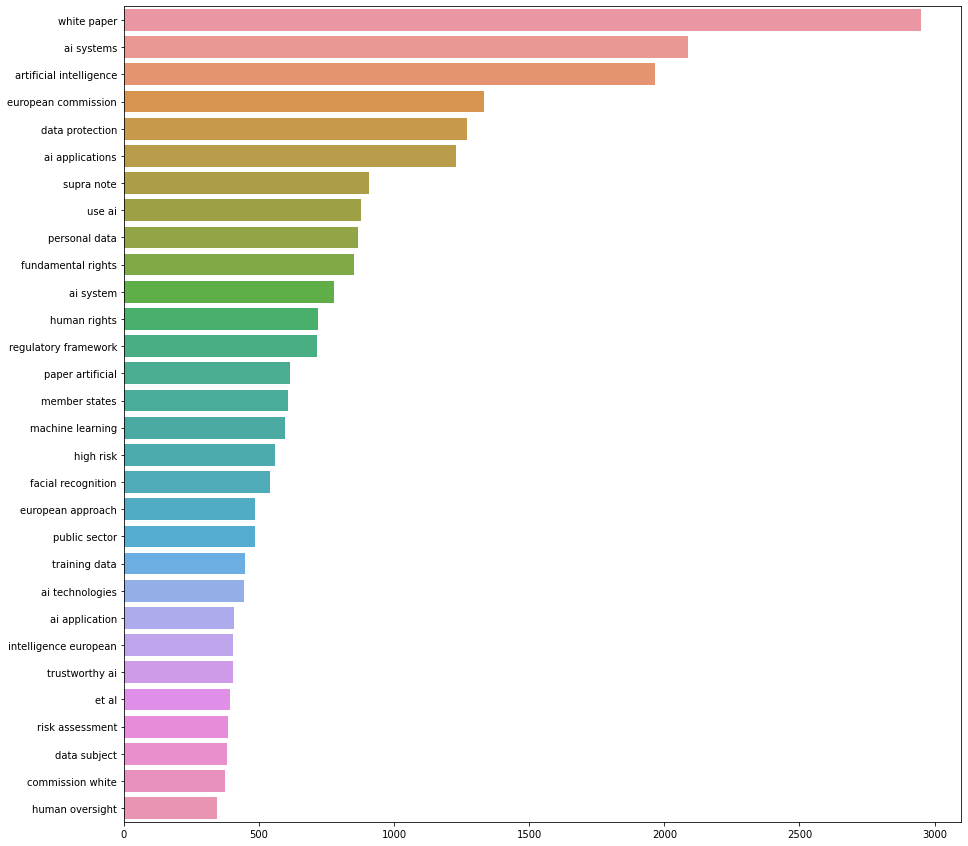

In [ ]:
top_n_bigrams=get_top_ngram(df['Text'],2,2)[:30]
plot_ngram(top_n_bigrams)

## 3-grams

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



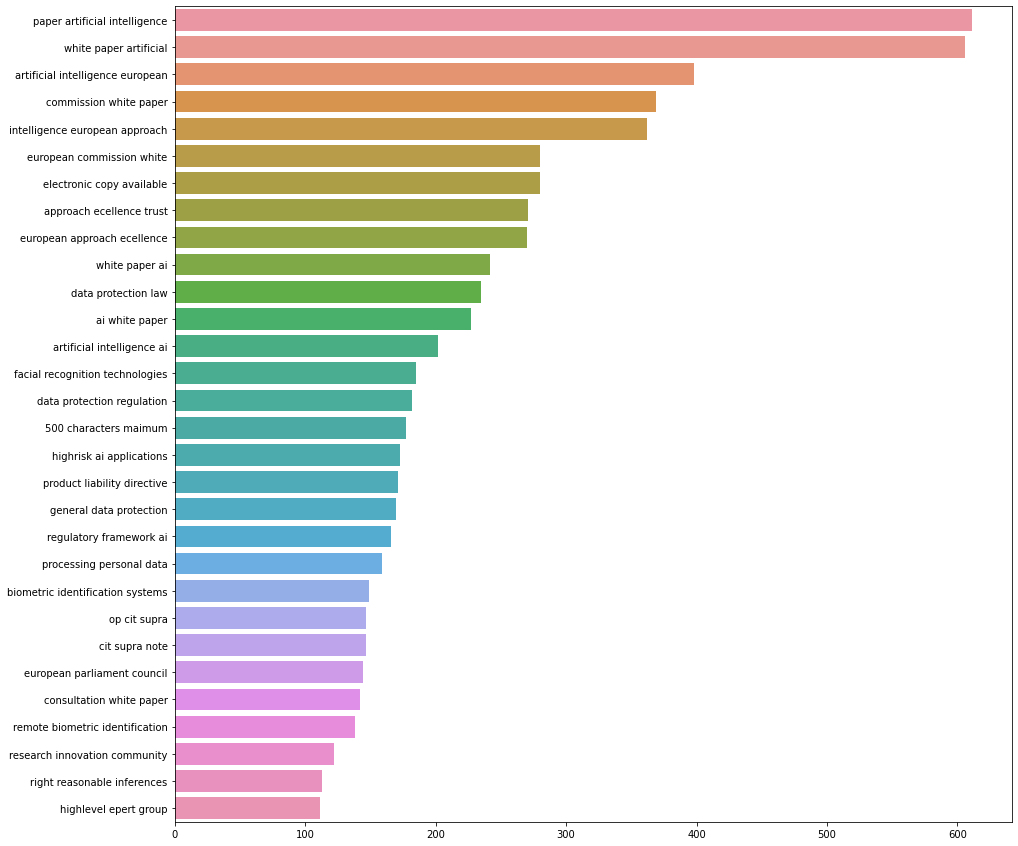

In [ ]:
top_n_bigrams=get_top_ngram(df['Text'],3,3)[:30]
plot_ngram(top_n_bigrams)

## 4-grams

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



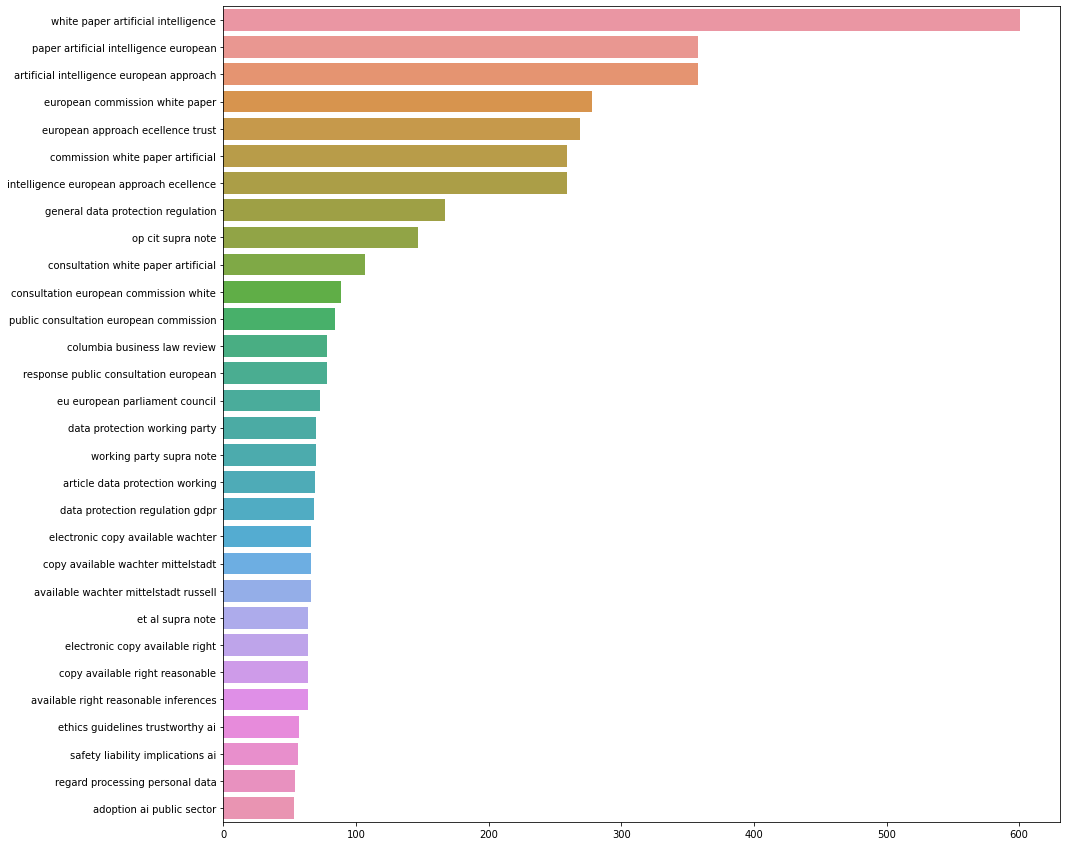

In [ ]:
top_n_bigrams=get_top_ngram(df['Text'],4,4)[:30]
plot_ngram(top_n_bigrams)

## 2-5 grams

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.



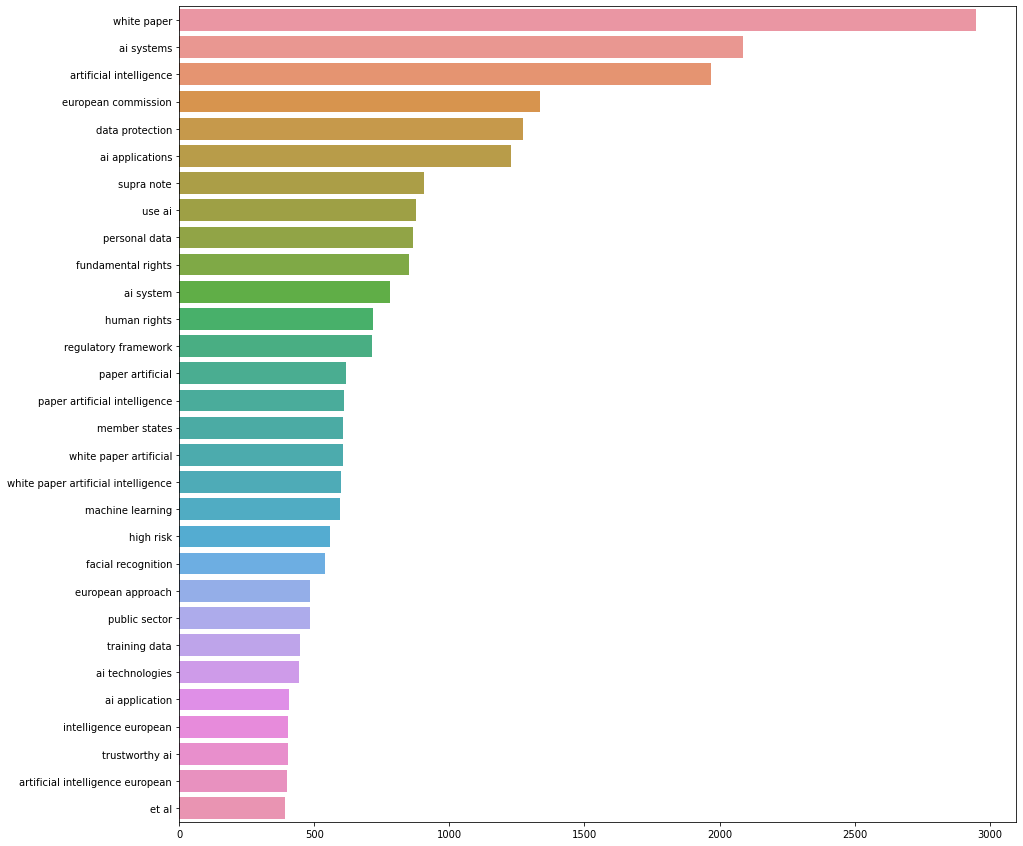

In [ ]:
top_n_bigrams=get_top_ngram(df['Text'],2,5)[:30]
plot_ngram(top_n_bigrams)

# Noun Chunks

Proposition for n-gram like structure from spacy creators. It focuses on ngrams focused on nouns.

In [ ]:
def get_noun_chunks(docs):
  noun_chunks = []
  for doc in docs:
    for chunk in doc.noun_chunks:
      noun_chunks.append(chunk.text)
  return noun_chunks

In [ ]:
noun_chunks = get_noun_chunks(docs)

## At least two words

In [ ]:
lim_noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))

In [ ]:
count_chunks = count_texts(lim_noun_chunks,['chunk', 'count'])

In [ ]:
plot_counts(count_chunks,['chunk', 'count'])

## At least three words

In [ ]:
noun_chunks = list(filter(lambda x: len(x.split()) > 2, noun_chunks))

chunk_freq = Counter(noun_chunks)
common_chunks = chunk_freq.most_common(20)

count_chunks = pd.DataFrame(common_chunks, columns=['chunk', 'count'])

fig = px.bar(count_chunks,orientation='h', y='chunk', x='count')

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10})
fig

## More complex analysis

In [ ]:
noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))
count_chunks = count_texts(noun_chunks,['chunk', 'count'],40)
plot_counts(count_chunks,['chunk', 'count'])

In [ ]:
def get_chunks(docs):
  chunks = list()
  for doc in docs:
    chunks = chunks + list(doc.noun_chunks)
  return chunks

In [ ]:
chunks = get_chunks(docs)

In [ ]:
def top_chunk_parents(chunks,count_chunks,n_chunks=10,n_parents=5):
  chunk_parents = []
  for chunk in chunks:
    if chunk.text in (list(count_chunks["chunk"][:n_chunks])):
      chunk_parents.append((chunk.text,chunk.root.head.text))
  ch_p_df = pd.DataFrame(chunk_parents, columns =['chunk','parent'])
  count_ch_p = ch_p_df.value_counts()
  count_ch_p = count_ch_p.reset_index()
  count_ch_p.columns =["chunk","parent","count"]
  most_common_parents = []
  for el in list(count_chunks["chunk"][:n_chunks]):
    p = count_ch_p[count_ch_p["chunk"]== el][:n_parents]
    most_common_parents.append(p)
  return most_common_parents

In [ ]:
most_common_parents = top_chunk_parents(chunks,count_chunks)

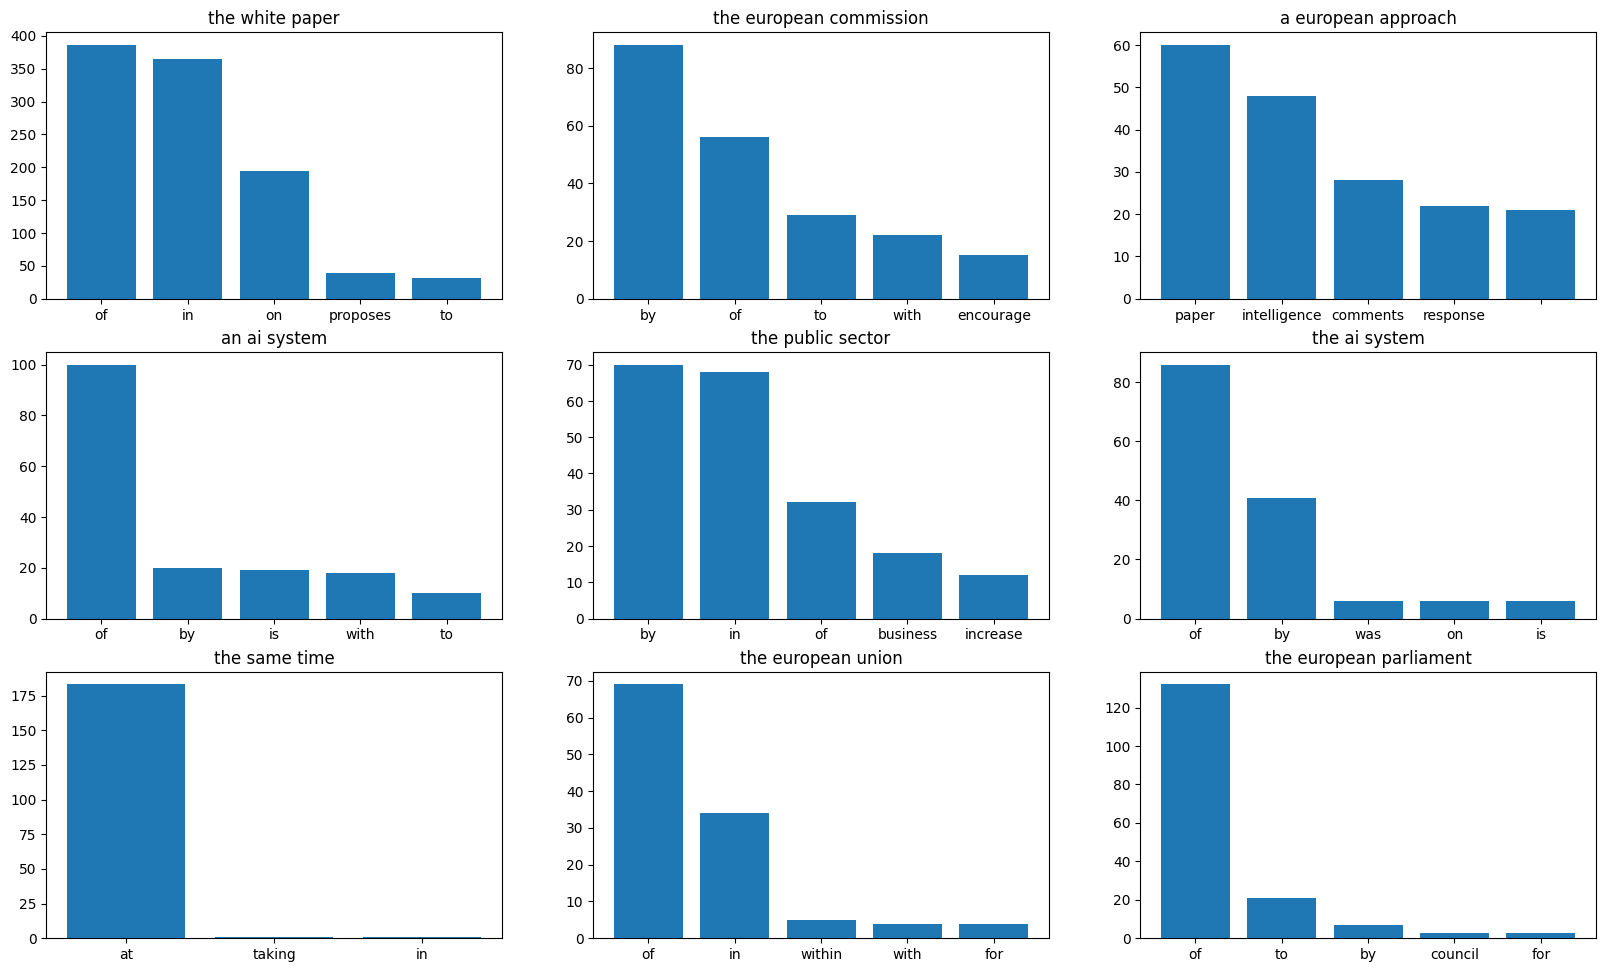

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(20, 12), dpi=100)
plt.figure(1)
for i in range(9):
  plt.subplot(331+i)
  plt.bar(most_common_parents[i]["parent"], most_common_parents[i]["count"])
  plt.title(most_common_parents[i]["chunk"].iloc[0])

## Chunk Frequency

In [ ]:
freq_chunk = []
for doc in docs:
  n_chunks = []
  for chunk in doc.noun_chunks:
    n_chunks.append(chunk.text)
  freq_chunk.append(n_chunks)

In [ ]:
def count_texts(texts,colnames=['obj', 'count'],n_obs=30):
  obj_freq = Counter(texts)
  common_obj = obj_freq.most_common(n_obs)
  count_obj = pd.DataFrame(common_obj, columns=colnames)
  return count_obj

In [ ]:
noun_chunks = get_noun_chunks(docs)
noun_chunks = list(filter(lambda x: len(x.split()) > 1, noun_chunks))
count_chunks = count_texts(noun_chunks,['chunk', 'count'],10)
common_chunks = count_chunks['chunk']
count_chunks = count_chunks['count']
common_chunks[0]


'the white paper'

In [ ]:
count_chunk = []
for ch in common_chunks:
  print(ch)
  x=0
  for i in range(len(freq_chunk)):
    if ch in freq_chunk[i]:
      x+=1
  count_chunk.append(x)
count_chunk[:3]

the white paper
the commission
artificial intelligence
ai systems
the use
the eu
the development
the gdpr
personal data
the european commission


[240, 192, 286]

In [ ]:
ch_name = []
ch_count = []
for ch in common_chunks:
  ch_name.append(ch)
for ch in count_chunks:
  ch_count.append(ch)
ch_name[:5]
ch_count[:5]

[1638, 1362, 1319, 1278, 1202]

In [ ]:
chunk_count_df = pd.DataFrame(ch_name)
chunk_count_df["Count"] = ch_count
chunk_count_df["CF"] = count_chunk
chunk_count_df["Percent"] = [x / len(docs) for x in count_chunk]
chunk_count_df.columns = ["Chunk","Count","ChunkFrequency", "Percent"]
chunk_count_df[:5]

,Chunk,Count,ChunkFrequency,Percent
0,the white paper,1638,240,0.699708
1,the commission,1362,192,0.559767
2,artificial intelligence,1319,286,0.833819
3,ai systems,1278,201,0.586006
4,the use,1202,263,0.766764


In [ ]:
list(chunk_count_df["Chunk"])[:5]

['the white paper',
 'the commission',
 'artificial intelligence',
 'ai systems',
 'the use']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.



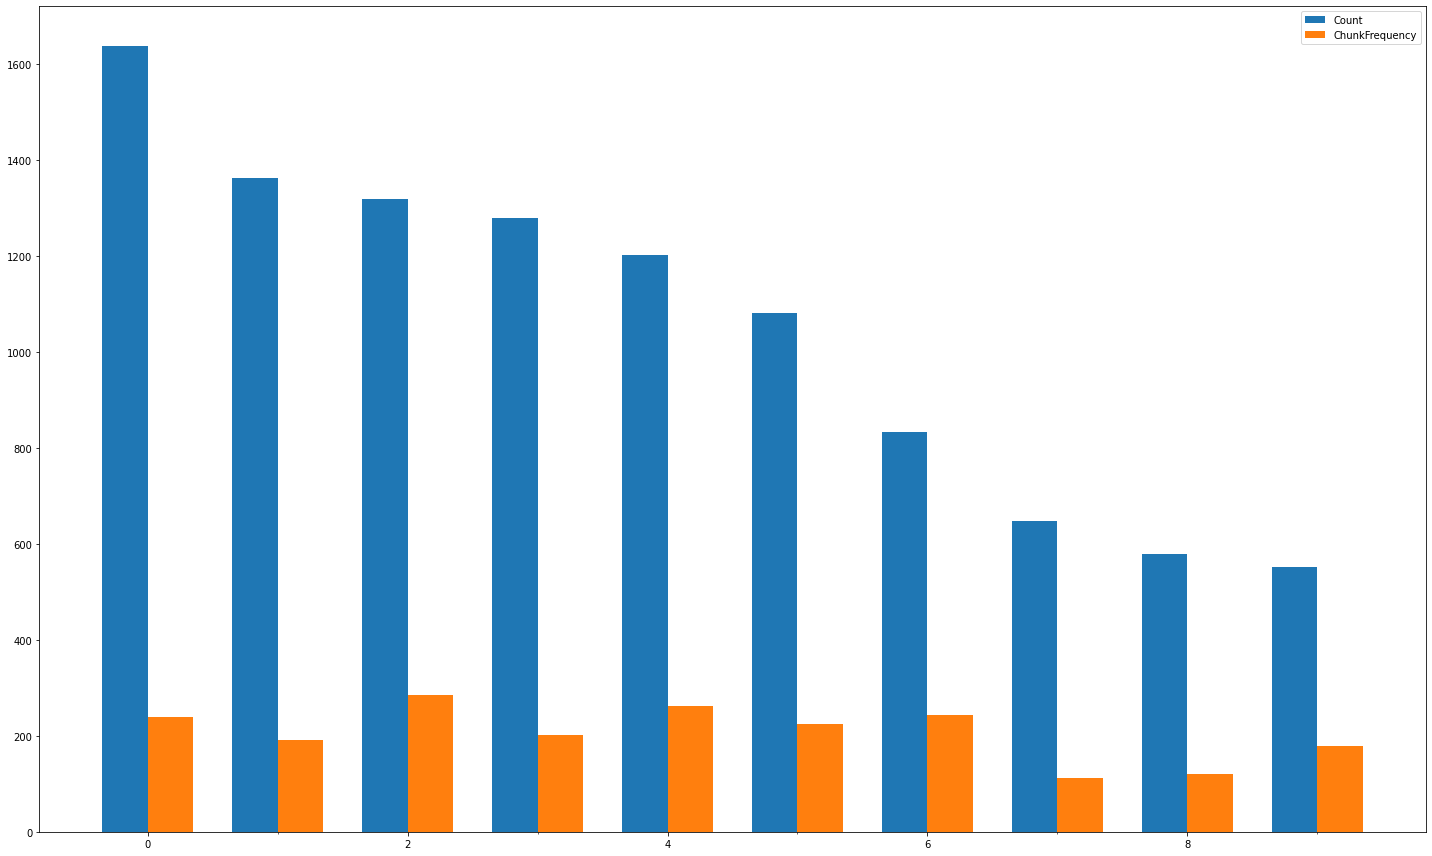

In [ ]:
labels = list(chunk_count_df["Chunk"])

x = np.arange(len(chunk_count_df["Chunk"]))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(20, 12))
rects1 = ax.bar(x - width/2, chunk_count_df["Count"], width, label='Count')
rects2 = ax.bar(x + width/2, chunk_count_df["ChunkFrequency"], width, label='ChunkFrequency')

ax.set_xticks(x, labels)
ax.legend()

fig.tight_layout()

plt.show()

# SVO Triples

I can't interprete the output + sometimes there are whole, long sentences as a triple.

Textacy

In [ ]:
tuples_list = []   
def extract_SVO(doc):
    tuples = textacy.extract.triples.subject_verb_object_triples(doc)
    print(tuples)
    tuples_to_list = list(tuples)
    if tuples_to_list != []:
        print("got at least one!")
        tuples_list.append(tuples_to_list)
    else:
        print("none!")
      
extract_SVO(docs[0])

tuples_list[0][:5]

<generator object subject_verb_object_triples at 0x7fc6dca3af50>
got at least one!


[SVOTriple(subject=[european, commission], verb=[published], object=[paper, opinion, approach, bias, defining]),
 SVOTriple(subject=[eu, equality, strategy], verb=[is, addressing], object=[issue]),
 SVOTriple(subject=[report], verb=[will, be, published], object=[issue]),
 SVOTriple(subject=[it], verb=[had, been, informed], object=[reports]),
 SVOTriple(subject=[we], verb=[will, address], object=[issues])]

In [ ]:
OBJECT_DEPS = {"dobj", "dative", "attr", "oprd"}
SUBJECT_DEPS = {"nsubj", "nsubjpass", "csubj", "agent", "expl"}

def extract_svo(doc):
    svo = []
    for token in doc:
        # is this a verb?
        if token.pos_ == "VERB":
          subj =''
          obj=''
          for t2 in token.children:
            if t2.dep_ in SUBJECT_DEPS:
              subj = t2.lemma_
            elif t2.dep_ in OBJECT_DEPS:
              obj = t2.lemma_
          svo.append((token.lemma_, subj, obj))
    return svo

In [ ]:
svos = docs.apply(extract_svo)
svos[:10]

0    [(d’étude, centre, ), (tel, conflits, ), (shap...
1    [(establish, , definition), (give, by, ), (dif...
2    [(thank, , you), (populate, we, repository), (...
3    [(digital, , step), (welcome, eurosmart, creat...
4    [(ai, intelligence, ), (emerge, beining, ), (g...
5    [(affirm, by, ), (raise, autonomy, question), ...
6    [(write, I, ), (epress, , view), (spell, intel...
7    [(investigate, I, test), (generate, research, ...
8    [(investigate, I, design), (generate, research...
9    [(trust, , ), (present, article, datum), (asso...
Name: Text, dtype: object

In [ ]:
all_svos = svos.sum()
all_svos[:10]

[('d’étude', 'centre', ''),
 ('tel', 'conflits', ''),
 ('shape', '', 'future'),
 ('d’étude', '', ''),
 ('publish', 'commission', 'define'),
 ('develop', '', ''),
 ('issue', 'paper', ''),
 ('anticipate', 'which', ''),
 ('address', 'strategy', 'issue'),
 ('publish', 'report', '')]

In [ ]:
df_svos = pd.DataFrame(all_svos)
df_svos.value_counts()

0         1       2           
ai                                3508
include                           1368
base                              1145
use                               1089
automate                          1067
                                  ... 
face      member  that               1
          nation  dynamic            1
          option  disadvantage       1
          people  amount             1
￭                                    1
Length: 65215, dtype: int64

# Textrank

In [ ]:
keyterms = []
for doc in docs:
  keyterms.append(textacy.extract.keyterms.textrank(doc))
len(keyterms)

343

In [ ]:
keyterms_list = []
for i in range(len(docs)):
  keyterms_df = pd.DataFrame.from_dict(keyterms[i])
  for j in range(len(keyterms_df[0])):
    keyterms_list.append(keyterms_df[0][j])
#keyterms_list[:5]
keyterms_freq = Counter(keyterms_list)
common_keyterms = keyterms_freq.most_common(40)
count_keyterms = pd.DataFrame(common_keyterms, columns=['keyterm', 'count'])
fig = px.bar(count_keyterms,orientation='h', y='keyterm', x='count')

fig['layout']['yaxis']['autorange'] = "reversed"
fig.update_layout(bargap=0.30, font={'size':10})
fig

In [ ]:
keyterms_df[0]

0      croatian ai association cro ai
1                ai innovation europe
2                   ​every ai startup
3               moment european ai rd
4    competitive european ai industry
5                    ai rd ecosystem​
6                        global ai rd
7                     ai rd community
8               ai legislative debate
9                      ai global race
Name: 0, dtype: object

# Sentiment Score

In [ ]:
sentiment_info = []
for doc in docs:
  sentiment = (doc._.blob.polarity, doc._.blob.subjectivity)
  sentiment_info.append(sentiment)

In [ ]:
sentiment_df = pd.DataFrame.from_dict(sentiment_info)
sentiment_df.columns=["polarity","subjectivity"]
sentiment_df

,polarity,subjectivity
0,0.054997,0.383740
1,0.075832,0.420557
2,0.075000,0.250000
3,0.091550,0.386299
4,0.138798,0.435937
...,...,...
338,0.081368,0.449683
339,-0.020556,0.437959
340,0.056510,0.446718
341,0.092300,0.392096


<BarContainer object of 343 artists>

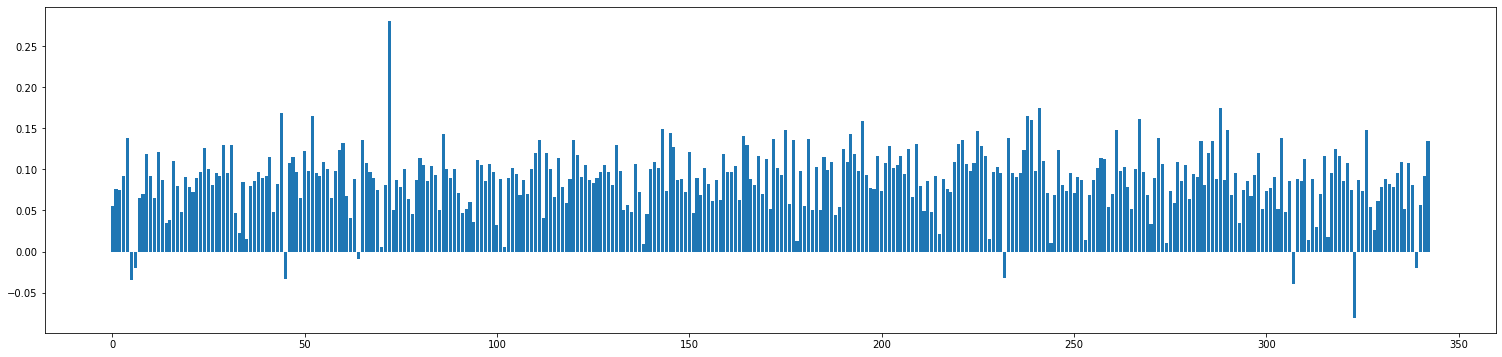

In [ ]:
plt.figure(figsize=(26,6))
plt.bar(range(343), sentiment_df['polarity'])

In [ ]:
sentiment_df[sentiment_df['polarity']<0]

,polarity,subjectivity
5,-0.034824,0.541225
6,-0.020500,0.330333
45,-0.033932,0.445421
64,-0.008981,0.342330
232,-0.032738,0.357143
307,-0.040121,0.413152
323,-0.080952,0.261905
339,-0.020556,0.437959


*   5   wydaje się oderwane od rzeczywistości bo traktuje o (nie) dawaniu praw człowieka sztucznej inteligencji
*   307 nie daje żadnej informacji
*   323 same linki, nic ciekawego
*   339 używa słów jak dehumanize, i faktycznie wyraża negatywne opienie / wskazuje błędy w WP



In [ ]:
df.iloc[5]["Name"]

'F514705-Contributo_Consultazione_IA_EU.txt'

<BarContainer object of 343 artists>

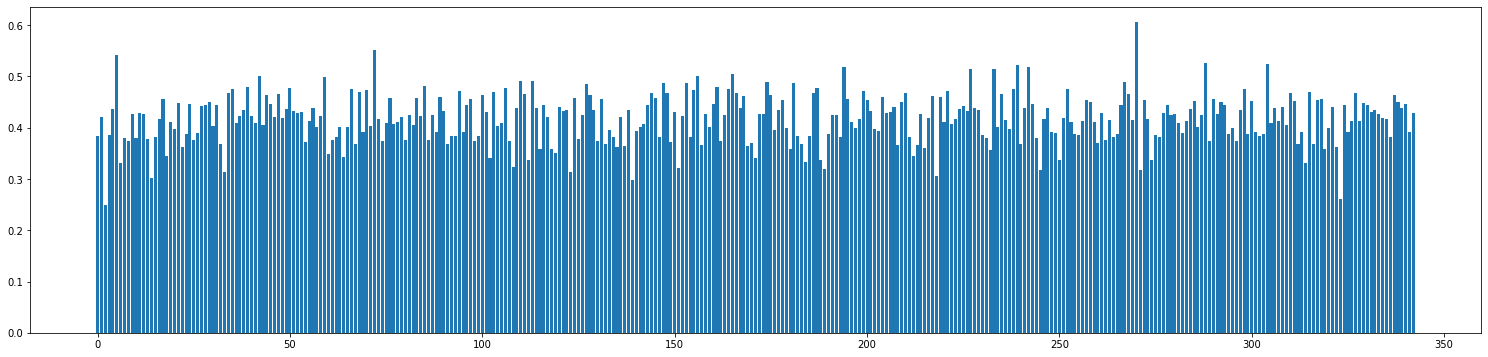

In [ ]:
plt.figure(figsize=(26,6))
plt.bar(range(343), sentiment_df['subjectivity'])

As we can see from the first plot, the sentiment of the respondents answers is quiet neutral with almost only, small positive values.

Their texts are also in between in being objective or subjective.